In [8]:
import models
import pandas as pd

db=models.tt_twitter()

database=pd.read_sql('''SELECT * FROM tt_twitter''', db.con)

print (database)

       top         tittles    twitts        date      time
0      1.0      Inglaterra  131000.0  2022-11-21  14:10:56
1      2.0         Maguire   71700.0  2022-11-21  14:10:56
2      3.0      Bellingham   85000.0  2022-11-21  14:10:56
3      4.0         Ecuador  773000.0  2022-11-21  14:10:56
4      5.0         Juliana  101000.0  2022-11-21  14:10:56
...    ...             ...       ...         ...       ...
3235  26.0           Prode    5822.0  2022-11-21  15:27:07
3236  27.0  lucila al 9009   13000.0  2022-11-21  15:27:07
3237  28.0  #alabarbarossa       NaN  2022-11-21  15:27:07
3238  29.0         Queiroz   10200.0  2022-11-21  15:27:07
3239  30.0         Senegal  116000.0  2022-11-21  15:27:07

[3240 rows x 5 columns]


Podemos observar que se realizó un scrapping durante una hora sobre los trending toppics de twitter para analizar el crecimiento de los tops, podemos utilizar 2 trendings como ejémplos para analizar la dependencia del top.

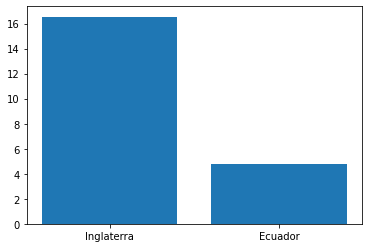

Tops del trending toppic Inglaterra:  [(1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (1.0,), (

In [12]:
import matplotlib.pyplot as plt
from models import tt_twitter
import numpy as np

db= tt_twitter()


Inglaterra=db.where_con("""SELECT twitts FROM tt_twitter WHERE tittles="Inglaterra";""")
Ecuador=db.where_con("""SELECT twitts FROM tt_twitter WHERE tittles="Ecuador";""")

cv = lambda x: np. std (x, ddof = 1 ) / np. mean (x) * 100 

x = cv(Inglaterra)
y = cv(Ecuador)

tittles=["Inglaterra","Ecuador"]

fig, ax = plt.subplots(1, sharey = True)

ax.bar(tittles,[x,y])
plt.show()

print ("Tops del trending toppic Inglaterra: ",db.read_where("""SELECT top FROM tt_twitter WHERE tittles = "Inglaterra";"""))
print ("twitts del trending toppic Inglaterra: ",Inglaterra)

print ("tops del trendig toppic Ecuador: ",db.read_where("""SELECT top FROM tt_twitter WHERE tittles = "Ecuador";"""))
print ("twitts del trending toppic Ecuador: ", Ecuador)


Podemos observar que el trending no depende de la cantidad de twitts en el momento sino del coeficiente de variación que determina la velocidad que aumenta la cantidad de twitts.